# video-games-sales-data_analysis

In [1]:
#importing relevent libraries;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

# importing the dataframe

In [2]:
df= pd.read_csv('C:/Users/abhi/Desktop/Video Games Dataset/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
#visualizing the dataframe
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#finding no. of rows and columns inside the dataframe
df.shape

(16717, 16)

there are total 16719 rows and 16 columns inside the selected dataframe

#### Now we will try to describe the dataframe to better understand what we are dealing with, and with the help of max, min and min we can get range for columns

In [5]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16448.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.488996,0.263255,0.145010,0.077610,0.047333,0.533462,68.967679,26.360821,7.125046,162.229908
std,5.877470,0.813475,0.503303,0.308836,0.186721,1.547956,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [6]:
# from this we got to know about the distribution of elements inside our dataframe

In [7]:
#lets check if the sales data in nominal figures is intact or not
df.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8580
Critic_Count       8580
User_Score         9127
User_Count         9127
Developer          6621
Rating             6767
dtype: int64

### from here we can see that platform column and also all the columns where sales figures are written does not contain any vacant cells

####lets find the vacant cells location from the Name column

In [8]:
np.where(pd.isnull(df['Name']))

(array([], dtype=int32),)

lets see if its true we will first slice our dataframe around this cell no's

In [9]:
df[655:660]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
655,Pro Wrestling,NES,1987.0,Fighting,Nintendo,0.77,0.18,1.42,0.03,2.40,NaN,NaN,NaN,NaN,NaN,NaN
656,Theme Hospital,PC,1997.0,Strategy,Electronic Arts,2.30,0.10,0.00,0.00,2.40,NaN,NaN,9.0,90.0,Bullfrog Productions,K-A
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39,73.0,4.0,NaN,NaN,Konami Computer Entertainment Hawaii,E
658,Monopoly,PC,1994.0,Misc,Hasbro Interactive,1.49,0.81,0.00,0.10,2.39,NaN,NaN,NaN,NaN,NaN,NaN
659,Guitar Hero,PS2,2005.0,Misc,RedOctane,1.67,0.61,0.03,0.07,2.38,91.0,65.0,8.7,173.0,Harmonix Music Systems,T


Here, we can see that Name in column 659 is empty

In [10]:
#lets assign the name to this cell and 14246'th cell
#This is shown for dataframe cleaning purpose only cause names cant be predicted.
# lets give it a name as- Super Mario for cell 659 and 14246'th cell as Contra
df['Name'][659]= 'Super Mario'
df['Name'][14246]= 'Contra'


<ipython-input-10-f48de88b5968>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][659]= 'Super Mario'
<ipython-input-10-f48de88b5968>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][14246]= 'Contra'


In [11]:
##now lets see if this got reflected in the dataframe or not

In [12]:
df["Name"][14246]

'Contra'

## Now we will check whether all the empty cells inside the column named 'Name' are filled or not

In [15]:
df['Name'].isnull().sum()

0

## ****Empty cells= 0 means we were able to the "Name" column effectively

## Now we will see if the sales values of NA, EU, JP and other sales equals to the global sell or not

In [16]:
df['Cross_checking']= df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [17]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,29.80
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN,28.31


## we will drop non important columns cause its making hurdle in cross checking cause dataframe isnt clearly visible

In [18]:
df.drop(columns= ['Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating'], axis=1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31.38
...,...,...,...,...,...,...,...,...,...,...,...
16712,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0.01
16713,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,0.01
16714,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,0.01
16715,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,0.01


From above we can see that all the sales figures combine forms Global_sales cause, Global_Sales= Cross_checking

#  Q.1 how many years of data do we have?

In [23]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [24]:
# we can see above that we are having the data from 2006 till 2017.

# Q.2 What is the total Global sale done by video game companies during 2006-2017?

In [25]:
df['Global_Sales'].sum()

8917.88

## Q.3 what is the sales according to the year of release of  video game titles?

In [26]:
df.groupby(['Year_of_Release'])['Global_Sales'].sum()

Year_of_Release
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     45.98
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    419.05
2005.0    458.31
2006.0    518.22
2007.0    605.37
2008.0    671.79
2009.0    658.88
2010.0    590.59
2011.0    507.79
2012.0    355.84
2013.0    361.24
2014.0    331.51
2015.0    268.05
2016.0    130.10
2017.0      0.06
2020.0      0.29
Name: Global_Sales, dtype: float64

## list mentioned above shows the Global sales of titles according to their release date

# Q.4 Is there any relationship between sales in North America and Global_Sales

In [27]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24


In [28]:
#lets declare two variables to see the relationship
X= df['NA_Sales']
Y= df['Global_Sales']

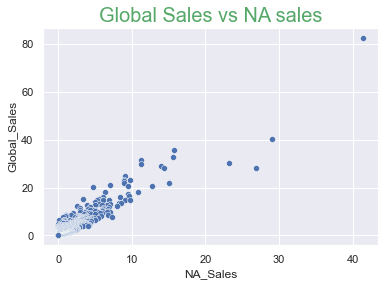

In [29]:
sns.scatterplot(x=X,y=Y)
plt.title('Global Sales vs NA sales', fontsize=20, color= 'g')
plt.show()

<AxesSubplot:xlabel='NA_Sales', ylabel='Global_Sales'>

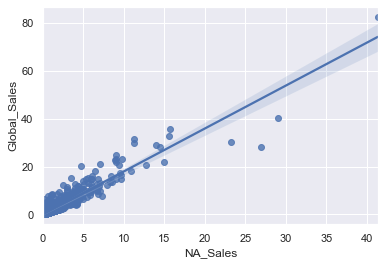

In [30]:
sns.regplot(x=X,y=Y)

# Now we will check whether there is significant relationship between this two variables

In [87]:
X= df['NA_Sales']
Y=df['Global_Sales']

In [92]:
X= sm.add_constant(X)

In [93]:
result=sm.OLS(Y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.293e+05
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        04:14:16   Log-Likelihood:                -12909.
No. Observations:               16717   AIC:                         2.582e+04
Df Residuals:                   16715   BIC:                         2.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0621      0.004     14.576      0.000       0.054       0.070
NA_Sales       1.7906      0.005    359.553      0.000       1.781       1.800
==============================================================================
Omnibus:                    10164.567   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39836369.679
Skew:                           1.200   Prob(JB):                         0.00
Kurtosis:                     242.136   Cond. No.                         1.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Here p value is 0.000,. Hence. we can conclude that independent variable is a good predictor of dependent variable

### Using OLS chart above we can create equation betn dep and independent variable which can show relationship between them

## Global_Sales= 0.0621+1.7906



## there seems to be a linear relationship between the sales in NA and Global sales, as NA_Sales goes up Global_Sales also goes up, Means we can say that Global_sales is dependent upon NA's economy

## Q.5 which platform is helping the most for global video games sales?

In [31]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38


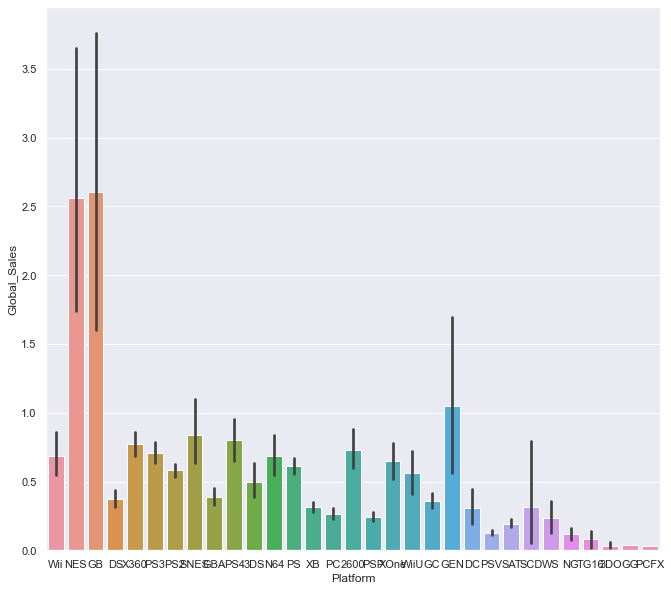

In [82]:
sns.barplot(x=df['Platform'],y=df['Global_Sales'])
from matplotlib import rcParams
rc={'figure.figsize':(4,10)}


here, we can see that the platforms named NES and GB is contributing most to the sales of video games.

In [83]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38


## Q.6 what genre of games got produced more during 2007 to 2016?

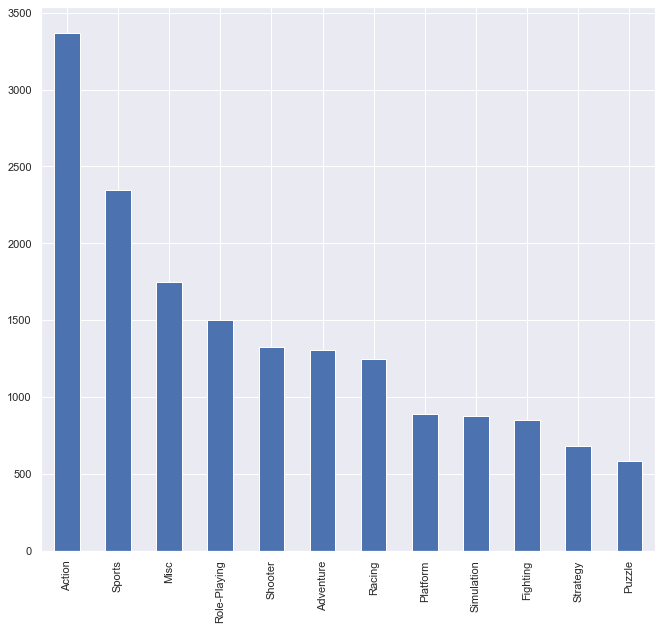

In [84]:
df['Genre'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=[5,10]

#### from the bar chart created above we can see that during 2006 to 2007, Action was the major category of games produced.

In [85]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38


## Q.7  how's the trend in global video game sales over the years?

<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

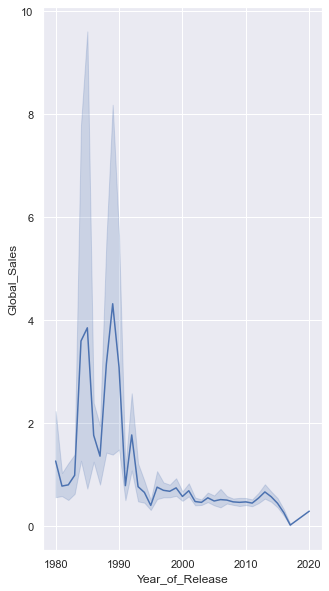

In [94]:
sns.lineplot(x=df['Year_of_Release'], y=df['Global_Sales'])

## During 1980 till 1990 global sales of video games was good and since then it is in declining mode 

## Q.8 What is the average sales amount of video games over the years 

In [95]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38


In [98]:
df.groupby(['Year_of_Release'])['Global_Sales'].mean()

Year_of_Release
1980.0    1.264444
1981.0    0.777609
1982.0    0.801667
1983.0    0.987647
1984.0    3.597143
1985.0    3.852857
1986.0    1.765238
1987.0    1.358750
1988.0    3.148000
1989.0    4.320588
1990.0    3.086875
1991.0    0.786098
1992.0    1.771395
1993.0    0.766333
1994.0    0.654380
1995.0    0.402329
1996.0    0.757224
1997.0    0.695433
1998.0    0.676649
1999.0    0.743343
2000.0    0.575943
2001.0    0.687697
2002.0    0.477093
2003.0    0.461677
2004.0    0.549934
2005.0    0.488083
2006.0    0.515129
2007.0    0.505739
2008.0    0.470771
2009.0    0.462048
2010.0    0.470590
2011.0    0.446998
2012.0    0.544931
2013.0    0.664044
2014.0    0.570585
2015.0    0.442327
2016.0    0.259163
2017.0    0.020000
2020.0    0.290000
Name: Global_Sales, dtype: float64

## Above series shows the average sales of video games over the years

## Q.9 which video game titles were hot selling globally during year 2006 to 2017?


In [101]:
df6= df.sort_values(['Global_Sales'], ascending= False)

In [103]:
df6

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Cross_checking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16292,Simple 2000 Series Vol. 120: The Saigo no Nipp...,PS2,2007.0,Strategy,D3Publisher,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16293,Casper,GBA,2002.0,Adventure,Microids,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16294,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,NaN,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16295,Adventure Time: The Secret of the Nameless,X360,2014.0,Adventure,Little Orbit,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01


## Dataframe above shows video games which were hot selling during this years, and 5 hot seller's publisher is same and that is Nitendo.